In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as pit
from google.colab.patches import cv2_imshow
import math
#from google.colab import drive
#drive.mount('/content/drive')

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [ 74  88 105 ...   1   1   1]
 [ 78  85 115 ...   1   1   1]
 [ 68  90  78 ...   1   1   1]]
(225, 225)


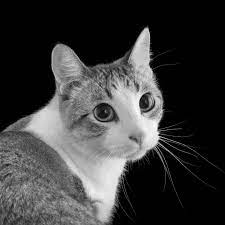

In [13]:
image = cv2.imread('/content/cat.jpeg',0)
print(image)
print(image.shape)
cv2_imshow(image)
height,width=image.shape

In [14]:
summition_of_intensity=0
for i in range(0,height):
  for j in range(0,width):
    summition_of_intensity+=image[i][j]

print("summition of intensity =" ,(summition_of_intensity))


numofpixels=height*width
global_mean=summition_of_intensity/numofpixels

print("global mean =",global_mean)

summition of intensity = 3034869
global mean = 59.94802962962963


In [15]:
summition_of_variance=0
for i in range(0,height):
  for j in range(0,width):
    summition_of_variance+=(image[i][j]-global_mean)**2
    

print("summition of variance =",summition_of_variance)


global_variance=summition_of_variance/numofpixels
print("global variance =",global_variance)


global_sd=math.sqrt(global_variance)
print("global_sd =",global_sd)

summition of variance = 275712192.26596135
global variance = 5446.166760809113
global_sd = 73.7981487627509


In [16]:
mean, std_dev = cv2.meanStdDev(image)
print("checkkkkk")
print("Global mean:", mean[0][0])
print("Global standard deviation:", std_dev[0][0])

checkkkkk
Global mean: 59.94802962962963
Global standard deviation: 73.79814876275013


In [17]:
K0=0.4
K1=0.02
K2=0.4
E=4
print("global mean =",global_mean)
print("global sd =",global_sd)
print("K0 =",K0)
print("K1 =",K1)
print("K2 =",K2)
print("E =",E)


global mean = 59.94802962962963
global sd = 73.7981487627509
K0 = 0.4
K1 = 0.02
K2 = 0.4
E = 4


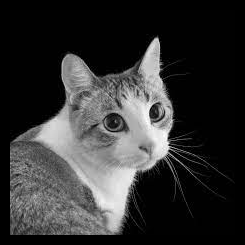

In [18]:
padding_value = 10
padding_image=[]
for i in range(height + 2*padding_value):
    row_pixels = []
    for j in range(width + 2*padding_value):
        if i >= padding_value and i < height + padding_value and j >= padding_value and j < width + padding_value: 
            row_pixels.append(image[i-padding_value, j-padding_value])
        else:
            row_pixels.append(0)
    padding_image.append(row_pixels)

padding_image = np.array(padding_image, dtype=np.uint8)

cv2_imshow(padding_image)

In [19]:
local_summition=0
local_summition_of_variance=0
mean_image = np.zeros((height, width), np.uint8)
variance_image = np.zeros((height, width), np.uint8)
sd_image = np.zeros((height, width), np.uint8)
output_image = np.zeros((height, width), np.uint8)
for i in range(padding_value, height+padding_value):
    for j in range(padding_value, width+padding_value):
      local_summition+=padding_image[i-1][j-1]
      local_summition+=padding_image[i-1][j]
      local_summition+=padding_image[i-1][j+1]
      local_summition+=padding_image[i][j-1]
      local_summition+=padding_image[i][j]
      local_summition+=padding_image[i][j+1]
      local_summition+=padding_image[i+1][j-1]
      local_summition+=padding_image[i+1][j]
      local_summition+=padding_image[i+1][j+1]
      local_mean=local_summition/9
      mean_image[i-padding_value, j-padding_value] = local_mean
      #print(local_mean)

      local_summition_of_variance+=(padding_image[i-1][j-1]-local_mean)**2
      local_summition_of_variance+=(padding_image[i-1][j]-local_mean)**2
      local_summition_of_variance+=(padding_image[i-1][j+1]-local_mean)**2
      local_summition_of_variance+=(padding_image[i][j-1]-local_mean)**2
      local_summition_of_variance+=(padding_image[i][j]-local_mean)**2
      local_summition_of_variance+=(padding_image[i][j+1]-local_mean)**2
      local_summition_of_variance+=(padding_image[i+1][j-1]-local_mean)**2
      local_summition_of_variance+=(padding_image[i+1][j]-local_mean)**2
      local_summition_of_variance+=(padding_image[i+1][j+1]-local_mean)**2
      local_variance=local_summition_of_variance/9
      variance_image[i-padding_value, j-padding_value] = local_variance
      #print(local_variance)

      local_sd=math.sqrt(local_variance)
      sd_image[i-padding_value, j-padding_value] = local_sd
      #print(local_sd)

      if(local_mean <= K0 * global_mean and K1 * global_sd <= local_sd <= K2 * global_sd ):
        output_pixel = E * padding_image[i][j]
      else:
        output_pixel = padding_image[i][j]


      output_image[i-padding_value, j-padding_value] = output_pixel

      local_summition=0
      local_mean=0
      local_summition_of_variance=0
      local_variance=0 
      local_sd=0

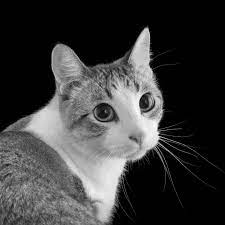

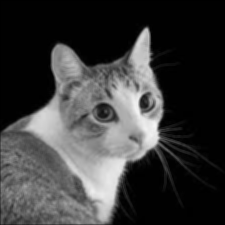

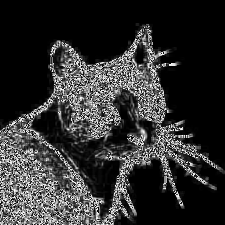

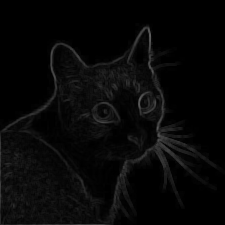

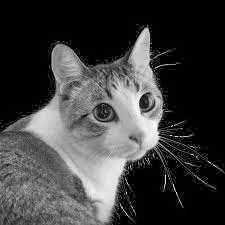

In [20]:
cv2_imshow(image)
print('')
cv2_imshow(mean_image)
print('')
cv2_imshow(variance_image)
print('')
cv2_imshow(sd_image)
print('')
cv2_imshow(output_image)


In [21]:
print(image.shape)
print(mean_image.shape)
print(variance_image.shape)
print(sd_image.shape)
print(output_image.shape)

(225, 225)
(225, 225)
(225, 225)
(225, 225)
(225, 225)


original image:


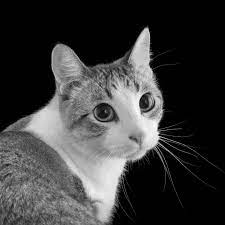


enhanced image:


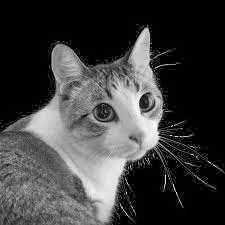

In [22]:
print("original image:")
cv2_imshow(image)
print('')
print("enhanced image:")
cv2_imshow(output_image)